In [2156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler


In [2157]:
#Leemos el dataset
df_bmw = pd.read_csv("C:/Users/stefa/Documents/MASTER/tareas/1/bmw_pricing_v3.csv")

In [2158]:
df_bmw.head(1)

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,NaN,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,False,NaN,True,NaN,True,NaN,11300.0,2018-01-01


In [2159]:
#Vemos la estructura de los datos
df_bmw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   marca                        3873 non-null   object 
 1   modelo                       4840 non-null   object 
 2   km                           4841 non-null   float64
 3   potencia                     4842 non-null   float64
 4   fecha_registro               2420 non-null   object 
 5   tipo_gasolina                4838 non-null   object 
 6   color                        4398 non-null   object 
 7   tipo_coche                   3383 non-null   object 
 8   volante_regulable            4839 non-null   object 
 9   aire_acondicionado           4357 non-null   object 
 10  camara_trasera               4841 non-null   object 
 11  asientos_traseros_plegables  1452 non-null   object 
 12  elevalunas_electrico         4841 non-null   object 
 13  bluetooth         

In [2160]:
df_bmw.shape

(4843, 18)

In [2161]:
df_bmw.describe()

,km,potencia,precio
count,4.841000e+03,4842.000000,4837.000000
mean,1.409593e+05,128.981826,15831.920612
std,6.020853e+04,38.994839,9222.630708
min,-6.400000e+01,0.000000,100.000000
25%,1.028840e+05,100.000000,10800.000000
50%,1.410800e+05,120.000000,14200.000000
75%,1.752170e+05,135.000000,18600.000000
max,1.000376e+06,423.000000,178500.000000


In [2162]:
#Comprobamos que no hay registros duplicados
df_bmw.duplicated().sum()

0

# Detección y análisis de nulos

In [2163]:
#Vemos los nulos que existen
df_bmw.isnull().sum()

marca                           970
modelo                            3
km                                2
potencia                          1
fecha_registro                 2423
tipo_gasolina                     5
color                           445
tipo_coche                     1460
volante_regulable                 4
aire_acondicionado              486
camara_trasera                    2
asientos_traseros_plegables    3391
elevalunas_electrico              2
bluetooth                       728
gps                               0
alerta_lim_velocidad            728
precio                            6
fecha_venta                       1
dtype: int64

In [2164]:
#Porcentaje de nulos
(df_bmw.isnull().sum()/len(df_bmw))*100

marca                          20.028908
modelo                          0.061945
km                              0.041297
potencia                        0.020648
fecha_registro                 50.030973
tipo_gasolina                   0.103242
color                           9.188520
tipo_coche                     30.146603
volante_regulable               0.082593
aire_acondicionado             10.035102
camara_trasera                  0.041297
asientos_traseros_plegables    70.018584
elevalunas_electrico            0.041297
bluetooth                      15.032005
gps                             0.000000
alerta_lim_velocidad           15.032005
precio                          0.123890
fecha_venta                     0.020648
dtype: float64

In [2165]:
#Hacemos una copia del dataset ya que vamos a empezar a modificarlo
df_bmw2=df_bmw.copy()

In [2166]:
#Eliminamos la columna marca que tiene un único valor repetido 
df_bmw2.drop(['marca'], axis=1, inplace=True)

In [2167]:
df_bmw2.head()

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,False,NaN,True,NaN,True,NaN,11300.0,2018-01-01
1,M4,13929.0,317.0,NaN,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,2018-02-01
2,320,183297.0,120.0,2012-04-01,diesel,white,NaN,False,False,False,NaN,True,False,True,False,10200.0,2018-02-01
3,420,128035.0,135.0,NaN,diesel,red,convertible,True,True,False,NaN,True,True,True,NaN,25100.0,2018-02-01
4,425,97097.0,160.0,NaN,diesel,silver,NaN,True,True,False,False,False,True,True,True,33400.0,2018-04-01


In [2168]:
#Ver los nulos tras rellenar
(df_bmw2.isnull().sum()/len(df_bmw2))*100

modelo                          0.061945
km                              0.041297
potencia                        0.020648
fecha_registro                 50.030973
tipo_gasolina                   0.103242
color                           9.188520
tipo_coche                     30.146603
volante_regulable               0.082593
aire_acondicionado             10.035102
camara_trasera                  0.041297
asientos_traseros_plegables    70.018584
elevalunas_electrico            0.041297
bluetooth                      15.032005
gps                             0.000000
alerta_lim_velocidad           15.032005
precio                          0.123890
fecha_venta                     0.020648
dtype: float64

In [2169]:
#Elimino las columnas con un alto porcentaje de nulos (asientos_traseros_plegables, fecha_registro)
col_to_delete=['asientos_traseros_plegables', 'fecha_registro']
for col in col_to_delete:
    if col in df_bmw2.columns:
        df_bmw2.drop(col, axis=1, inplace=True)

In [2170]:
#Elimino también la columna fecha_venta ya que no considero que sea determinante para el precio
df_bmw2.drop(['fecha_venta'], axis=1, inplace=True)

In [2171]:
df_bmw2.head()

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio
0,118,140411.0,100.0,diesel,black,NaN,True,True,False,True,NaN,True,NaN,11300.0
1,M4,13929.0,317.0,petrol,grey,convertible,True,True,False,False,True,True,True,69700.0
2,320,183297.0,120.0,diesel,white,NaN,False,False,False,True,False,True,False,10200.0
3,420,128035.0,135.0,diesel,red,convertible,True,True,False,True,True,True,NaN,25100.0
4,425,97097.0,160.0,diesel,silver,NaN,True,True,False,False,True,True,True,33400.0


In [2172]:
#Veo los nulos
df_bmw2.isnull().sum()

modelo                     3
km                         2
potencia                   1
tipo_gasolina              5
color                    445
tipo_coche              1460
volante_regulable          4
aire_acondicionado       486
camara_trasera             2
elevalunas_electrico       2
bluetooth                728
gps                        0
alerta_lim_velocidad     728
precio                     6
dtype: int64

In [2173]:
#Veo el porcentaje de nulos
(df_bmw2.isnull().sum()/len(df_bmw2))*100

modelo                   0.061945
km                       0.041297
potencia                 0.020648
tipo_gasolina            0.103242
color                    9.188520
tipo_coche              30.146603
volante_regulable        0.082593
aire_acondicionado      10.035102
camara_trasera           0.041297
elevalunas_electrico     0.041297
bluetooth               15.032005
gps                      0.000000
alerta_lim_velocidad    15.032005
precio                   0.123890
dtype: float64

In [2174]:
#Creo otra copia del dataset para seguir modificando
df_bmw3=df_bmw2.copy()
df_bmw3

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio
0,118,140411.0,100.0,diesel,black,NaN,True,True,False,True,NaN,True,NaN,11300.0
1,M4,13929.0,317.0,petrol,grey,convertible,True,True,False,False,True,True,True,69700.0
2,320,183297.0,120.0,diesel,white,NaN,False,False,False,True,False,True,False,10200.0
3,420,128035.0,135.0,diesel,red,convertible,True,True,False,True,True,True,NaN,25100.0
4,425,97097.0,160.0,diesel,silver,NaN,True,True,False,False,True,True,True,33400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4838,218 Gran Tourer,39743.0,110.0,diesel,black,NaN,False,True,False,False,False,True,False,14600.0
4839,218 Active Tourer,49832.0,100.0,diesel,grey,NaN,False,True,False,False,False,True,True,17500.0
4840,218 Gran Tourer,19633.0,110.0,diesel,grey,van,False,True,False,False,False,True,True,17000.0
4841,218 Active Tourer,27920.0,110.0,diesel,brown,van,True,True,False,False,False,True,True,22700.0


In [2175]:
#Elimino los valores nulos cuyo porcentaje es inferior al 1%
nulos=['modelo', 'km', 'potencia', 'tipo_gasolina', 'volante_regulable', 'camara_trasera', 'elevalunas_electrico', 'precio']
df_bmw3=df_bmw3.dropna(subset=nulos)
df_bmw3.isnull().sum()/len(df_bmw3)*100

modelo                   0.000000
km                       0.000000
potencia                 0.000000
tipo_gasolina            0.000000
color                    9.173931
tipo_coche              30.095475
volante_regulable        0.000000
aire_acondicionado      10.004151
camara_trasera           0.000000
elevalunas_electrico     0.000000
bluetooth               15.047738
gps                      0.000000
alerta_lim_velocidad    15.047738
precio                   0.000000
dtype: float64

In [2176]:
#Relleno los nulos de la columna color y tipo coche
df_bmw3['color'].fillna('sin_color', inplace=True)
df_bmw3['tipo_coche'].fillna('tipo_coche_desconocido', inplace=True)

C:\Users\stefa\AppData\Local\Temp\ipykernel_12588\1166374534.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bmw3['color'].fillna('sin_color', inplace=True)
C:\Users\stefa\AppData\Local\Temp\ipykernel_12588\1166374534.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bmw3['tipo_coche'].fillna('tipo_coche_desconocido', inplace=True)


In [2177]:
df_bmw3.isnull().sum()/len(df_bmw3)*100

modelo                   0.000000
km                       0.000000
potencia                 0.000000
tipo_gasolina            0.000000
color                    0.000000
tipo_coche               0.000000
volante_regulable        0.000000
aire_acondicionado      10.004151
camara_trasera           0.000000
elevalunas_electrico     0.000000
bluetooth               15.047738
gps                      0.000000
alerta_lim_velocidad    15.047738
precio                   0.000000
dtype: float64

In [2178]:
df_bmw3['aire_acondicionado'].value_counts()

True     3449
False     887
Name: aire_acondicionado, dtype: int64

In [2179]:
df_bmw3['elevalunas_electrico'].value_counts()

False    2599
True     2219
Name: elevalunas_electrico, dtype: int64

In [2180]:
df_bmw3['alerta_lim_velocidad'].value_counts()

True     2227
False    1866
Name: alerta_lim_velocidad, dtype: int64

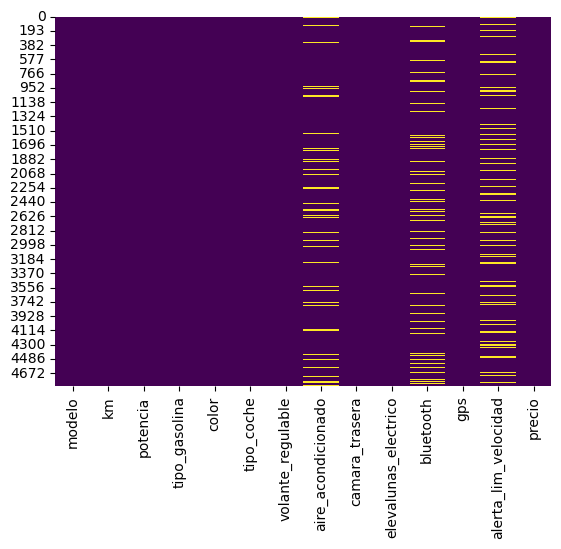

In [2181]:
#Genero un gráfico de nulos para ver si estos nulos están distribuidos y determinar si los elimino o los relleno
sns.heatmap(df_bmw3.isnull(), cmap='viridis', cbar=False)
plt.show()

In [2182]:
#tras haber observado que la moda es True para aire acondicionado lo relleno con la moda
moda_aire=df_bmw3['aire_acondicionado'].mode()
moda_bluetooth=df_bmw3['bluetooth'].mode()
moda_alerta=df_bmw3['alerta_lim_velocidad'].mode()

In [2183]:
#realizo una copia del dataset por si necesito volver al punto anterior
df_bmw4=df_bmw3.copy()

In [2184]:
#Relleno los nulos con la moda
df_bmw4['aire_acondicionado'].fillna(moda_aire,inplace=True)
df_bmw4['bluetooth'].fillna(moda_bluetooth,inplace=True)
df_bmw4['alerta_lim_velocidad'].fillna(moda_alerta,inplace=True)

In [2185]:
#Reviso el porcentaje de los nulos
df_bmw4.isnull().sum()/len(df_bmw4)*100

modelo                   0.000000
km                       0.000000
potencia                 0.000000
tipo_gasolina            0.000000
color                    0.000000
tipo_coche               0.000000
volante_regulable        0.000000
aire_acondicionado      10.004151
camara_trasera           0.000000
elevalunas_electrico     0.000000
bluetooth               15.026982
gps                      0.000000
alerta_lim_velocidad    15.026982
precio                   0.000000
dtype: float64

In [2186]:
#convierto las columnas en boolean
df_bmw4['aire_acondicionado'] = df_bmw4['aire_acondicionado'].astype('bool')
df_bmw4['bluetooth'] = df_bmw4['bluetooth'].astype('bool')
df_bmw4['alerta_lim_velocidad'] = df_bmw4['alerta_lim_velocidad'].astype('bool')

In [2187]:
#Relleno los nulos de las columnas con la moda
df_bmw4['aire_acondicionado'].fillna(moda_aire, inplace=True)
df_bmw4['bluetooth'].fillna(moda_bluetooth, inplace=True)
df_bmw4['alerta_lim_velocidad'].fillna(moda_alerta, inplace=True)

In [2188]:
df_bmw4.head(1)

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio
0,118,140411.0,100.0,diesel,black,tipo_coche_desconocido,True,True,False,True,False,True,True,11300.0


# Análisis univariable

In [2189]:
df_bmw4.describe().T

,count,mean,std,min,25%,50%,75%,max
km,4818.0,140961.902242,60264.807827,-64.0,102782.5,141027.0,175247.75,1000376.0
potencia,4818.0,128.982980,39.001042,0.0,100.0,120.0,135.00,423.0
precio,4818.0,15839.414695,9223.632278,100.0,10825.0,14200.0,18600.00,178500.0


In [2190]:
#Reviso los outliers de km y los elimino del dataset
km_to_delete= df_bmw4[(df_bmw4["km"] < 0) | (df_bmw4["km"] > 400000)]
df_bmw4.drop(km_to_delete.index, inplace=True)


<Axes: >

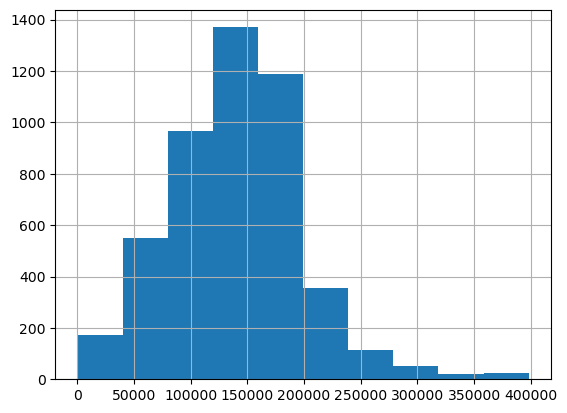

In [2191]:
#Grafico como ha quedado la columna km
df_bmw4['km'].hist()

In [2192]:
#Elimino los outliers de la columna potencia
potencia_to_delete=df_bmw4[(df_bmw4['potencia'] <= 50) | (df_bmw4['potencia'] > 400)]
df_bmw4.drop(potencia_to_delete.index, inplace=True)

c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\displayhook.py:281: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


<Axes: >

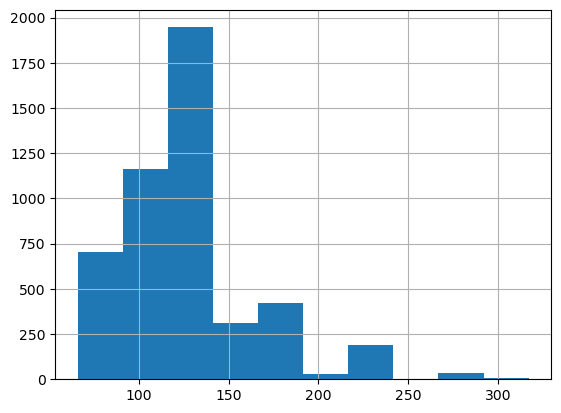

In [2193]:
#Grafico como ha quedado la distribución de la columna
df_bmw4['potencia'].hist()

<Axes: >

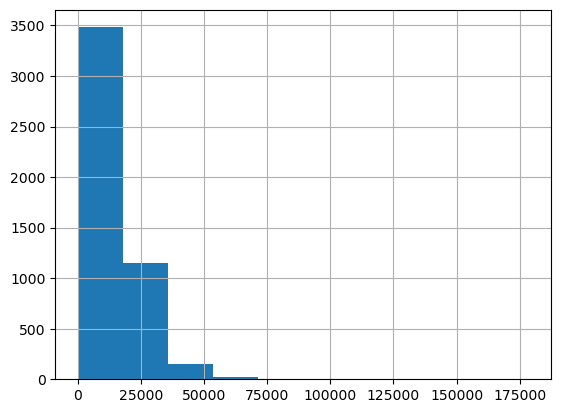

In [2194]:
df_bmw4['precio'].hist()

In [2195]:
#compruebo que hay outliers con respecto al precio ya que existen coches con pocos km por menos de -1300€
df_bmw4[((df_bmw4['precio']<=1300)) & (df_bmw4['km']<200000) ]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio
170,320,146639.0,135.0,diesel,silver,estate,False,True,False,False,False,True,True,800.0
171,316,159983.0,85.0,diesel,grey,estate,False,False,False,False,False,False,True,800.0
187,320,101013.0,120.0,diesel,blue,estate,False,True,False,False,False,True,True,800.0
188,316,130019.0,85.0,diesel,white,estate,False,False,False,False,False,False,True,800.0
197,320,165516.0,135.0,diesel,blue,estate,False,False,False,False,True,True,False,800.0
202,318,170164.0,105.0,diesel,grey,tipo_coche_desconocido,False,True,False,False,True,True,True,800.0
213,330,127461.0,190.0,diesel,silver,estate,False,True,False,False,False,True,True,800.0
215,320,183683.0,135.0,diesel,black,estate,False,False,False,False,True,True,False,1200.0
222,318,147097.0,105.0,diesel,sin_color,estate,False,False,False,False,False,False,True,800.0
245,320,150969.0,135.0,diesel,blue,estate,False,False,False,False,False,True,False,800.0


In [2196]:
#Encuentro outliers en la columna precio y los elimino
precio_to_delete=df_bmw4[(df_bmw4['precio']<=1300) | (df_bmw4['precio']>=150000) ]
df_bmw4.drop(precio_to_delete.index,inplace=True)

In [2197]:
df_bmw4.describe().T

,count,mean,std,min,25%,50%,75%,max
km,4728.0,139524.211717,57202.227535,476.0,102021.25,140189.5,174781.75,398043.0
potencia,4728.0,129.281514,38.554526,70.0,100.00,120.0,135.00,317.0
precio,4728.0,16035.384941,8677.359423,1400.0,11075.00,14300.0,18800.00,142800.0


In [2198]:
#compruebo que ya no existen outliers
df_bmw4[((df_bmw4['precio'] < -1300) & (df_bmw4['km'] < 200000))]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio


<Axes: >

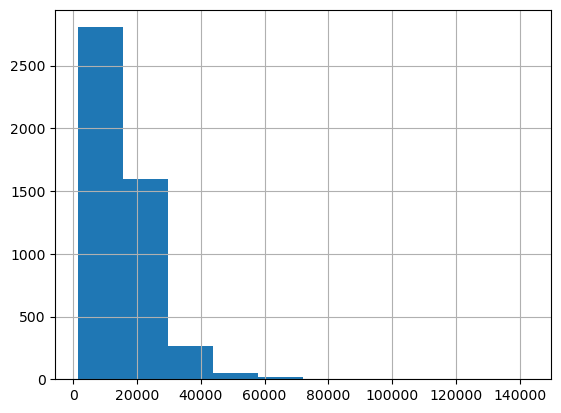

In [2199]:
#tras eliminar los outliers, la distribución del precio es más acertada
df_bmw4['precio'].hist()

In [2200]:
#convierto el precio a escala logarítmica
df_bmw4["LOG_PRECIO"]=np.log10(df_bmw4["precio"])


<Axes: >

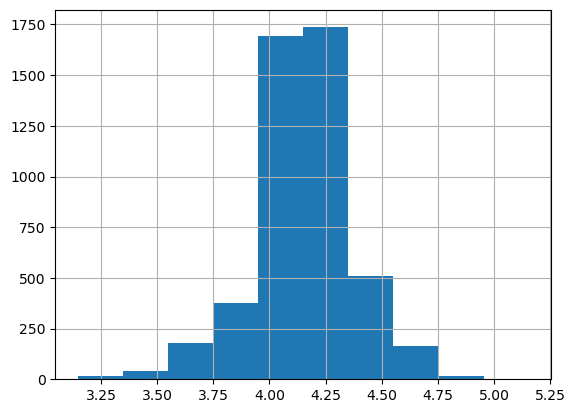

In [2201]:
df_bmw4['LOG_PRECIO'].hist()

In [2202]:
#realizo una copia del dataset con todos los cambios de las columnas numéricas
df_bmw5=df_bmw4.copy()

In [2203]:
#Guardo el dataframe en un archivo pickle para usarlo posteriormente
pd.to_pickle(df_bmw5,"C:/Users/stefa/Documents/MASTER/tareas/1/dataEngineeringBmw_PK")


In [2204]:
#Recupero el archivo pickle 
df_bmw5 = pd.read_pickle("dataEngineeringBmw_PK")


In [2205]:
df_bmw5.describe(include=['object']).T

,count,unique,top,freq
modelo,4728,75,320,720
tipo_gasolina,4728,5,diesel,4537
color,4728,11,black,1473
tipo_coche,4728,9,tipo_coche_desconocido,1426
volante_regulable,4728,2,True,2632
camara_trasera,4728,2,False,3769
elevalunas_electrico,4728,2,False,2517


In [2206]:
df_bmw5.describe(include='bool')

,aire_acondicionado,bluetooth,gps,alerta_lim_velocidad
count,4728,4728,4728,4728
unique,2,2,2,2
top,True,False,True,True
freq,3899,3035,4427,2916


In [2207]:
#Convierto las columnas con valores bool a numéricas (int)
for columna in ["elevalunas_electrico", "camara_trasera", "volante_regulable", 'aire_acondicionado','gps', 'alerta_lim_velocidad', 'bluetooth' ]:
    df_bmw5[columna] = df_bmw5[columna].astype("int64")


In [2208]:
df_bmw5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4728 entries, 0 to 4842
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   modelo                4728 non-null   object 
 1   km                    4728 non-null   float64
 2   potencia              4728 non-null   float64
 3   tipo_gasolina         4728 non-null   object 
 4   color                 4728 non-null   object 
 5   tipo_coche            4728 non-null   object 
 6   volante_regulable     4728 non-null   int64  
 7   aire_acondicionado    4728 non-null   int64  
 8   camara_trasera        4728 non-null   int64  
 9   elevalunas_electrico  4728 non-null   int64  
 10  bluetooth             4728 non-null   int64  
 11  gps                   4728 non-null   int64  
 12  alerta_lim_velocidad  4728 non-null   int64  
 13  precio                4728 non-null   float64
 14  LOG_PRECIO            4728 non-null   float64
dtypes: float64(4), int64(

In [2209]:
#Reviso la columna tipo_gasolina
df_bmw5["tipo_gasolina"].value_counts()


diesel           4537
petrol            177
hybrid_petrol       6
Diesel              5
electro             3
Name: tipo_gasolina, dtype: int64

In [2210]:
#Unifico los coches de tipo diesel
df_bmw5["tipo_gasolina"] = df_bmw5["tipo_gasolina"].str.lower()

In [2211]:
df_bmw5.head(1)

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,LOG_PRECIO
0,118,140411.0,100.0,diesel,black,tipo_coche_desconocido,1,1,0,1,0,1,1,11300.0,4.053078


In [2212]:
#Tras revisar las columnas, compruebo que tengo que eliminar la columna precio 
del df_bmw5["precio"]


In [2213]:
#Creo una copia del dataset con las últimas modificaciones
df_bmw6=df_bmw5.copy()

In [2214]:
df_bmw6.head(1)

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,LOG_PRECIO
0,118,140411.0,100.0,diesel,black,tipo_coche_desconocido,1,1,0,1,0,1,1,4.053078


# Correlación Inicial

In [2215]:
corr_bmw = df_bmw6.corr(numeric_only=True)
corr_bmw.style.background_gradient(cmap="coolwarm")

,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,LOG_PRECIO
km,1.000000,-0.028746,0.080030,0.054237,0.007286,0.065936,-0.018416,0.170068,-0.013963,-0.447976
potencia,-0.028746,1.000000,0.326112,0.173578,0.312030,0.343950,0.191216,-0.002051,0.429414,0.598383
volante_regulable,0.080030,0.326112,1.000000,0.282703,0.255321,0.271497,0.104375,0.234651,0.188902,0.246423
aire_acondicionado,0.054237,0.173578,0.282703,1.000000,0.145448,0.252690,0.099597,0.337677,0.161641,0.277176
camara_trasera,0.007286,0.312030,0.255321,0.145448,1.000000,0.196642,0.124633,0.058282,0.168272,0.226620
elevalunas_electrico,0.065936,0.343950,0.271497,0.252690,0.196642,1.000000,0.200959,0.195775,0.299379,0.335544
bluetooth,-0.018416,0.191216,0.104375,0.099597,0.124633,0.200959,1.000000,0.102599,0.087872,0.178947
gps,0.170068,-0.002051,0.234651,0.337677,0.058282,0.195775,0.102599,1.000000,-0.059438,-0.023503
alerta_lim_velocidad,-0.013963,0.429414,0.188902,0.161641,0.168272,0.299379,0.087872,-0.059438,1.000000,0.424756
LOG_PRECIO,-0.447976,0.598383,0.246423,0.277176,0.226620,0.335544,0.178947,-0.023503,0.424756,1.000000


# Análisis variable vs target

modelo 
 320                720
520                622
318                550
X3                 432
116                357
                  ... 
630                  1
735                  1
ActiveHybrid 5       1
635                  1
214 Gran Tourer      1
Name: modelo, Length: 75, dtype: int64 

[[<Axes: title={'center': 'km'}>]]
[[<Axes: title={'center': 'potencia'}>]]
tipo_gasolina 
 diesel           4542
petrol            177
hybrid_petrol       6
electro             3
Name: tipo_gasolina, dtype: int64 

color 
 black        1473
grey         1055
blue          619
white         472
sin_color     431
brown         302
silver        277
red            46
beige          37
green          10
orange          6
Name: color, dtype: int64 

tipo_coche 
 tipo_coche_desconocido    1426
estate                    1066
sedan                      802
suv                        744
hatchback                  483
subcompact                  77
coupe                       72
convertible      

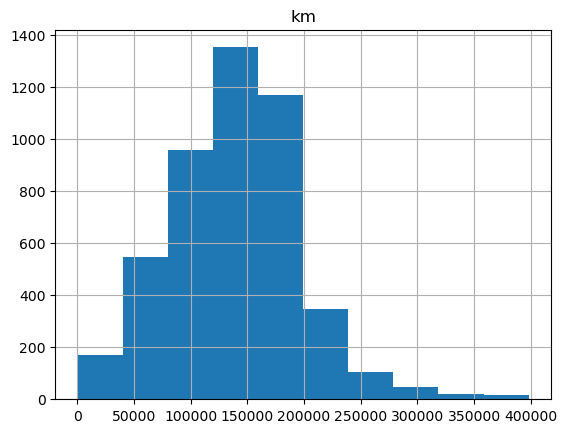

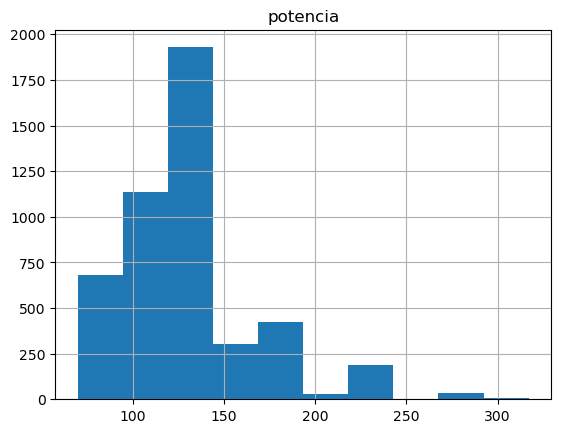

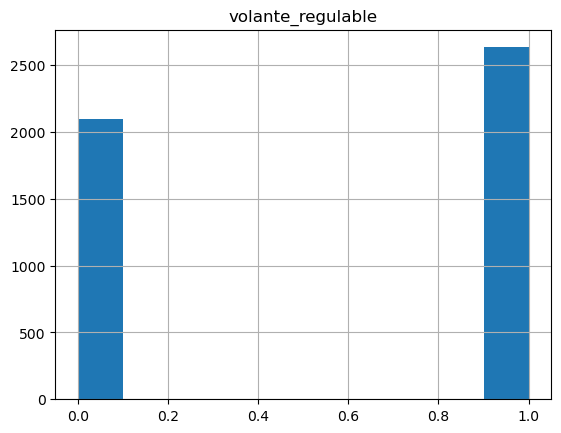

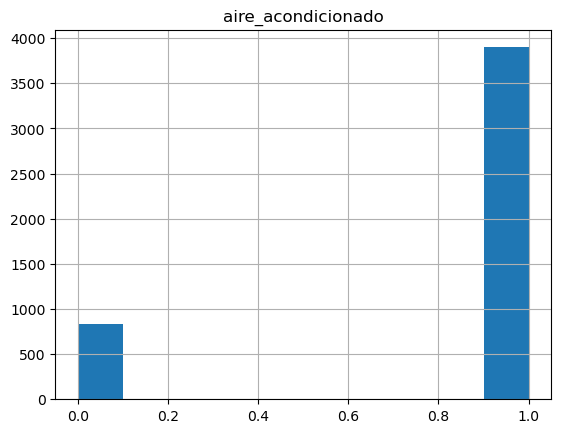

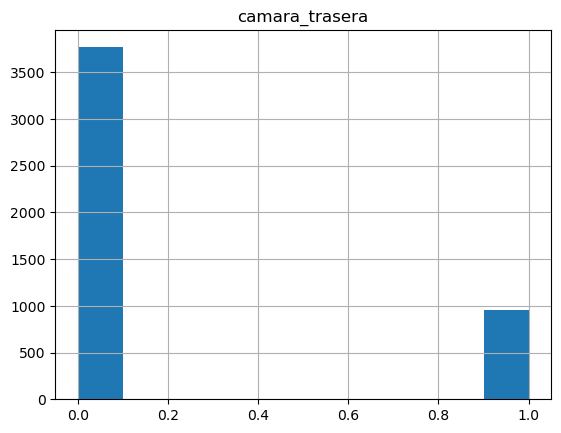

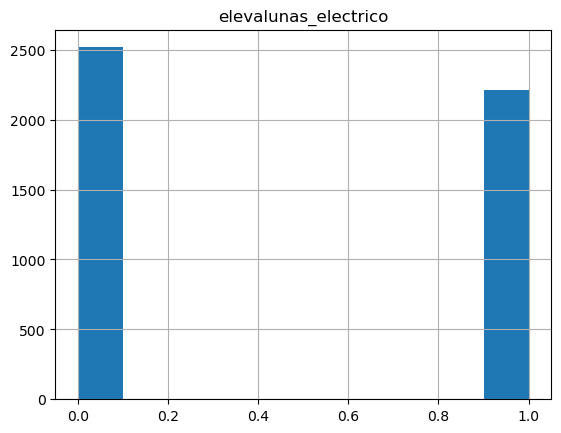

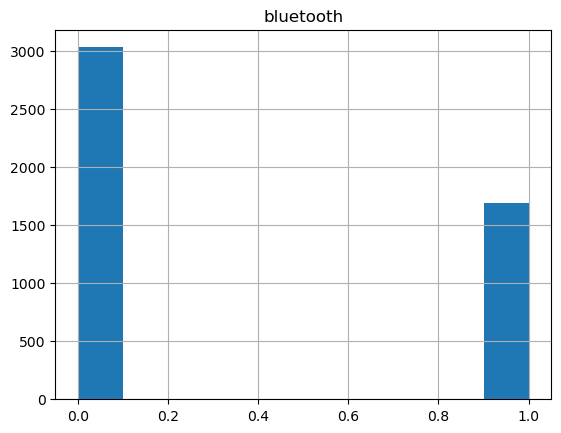

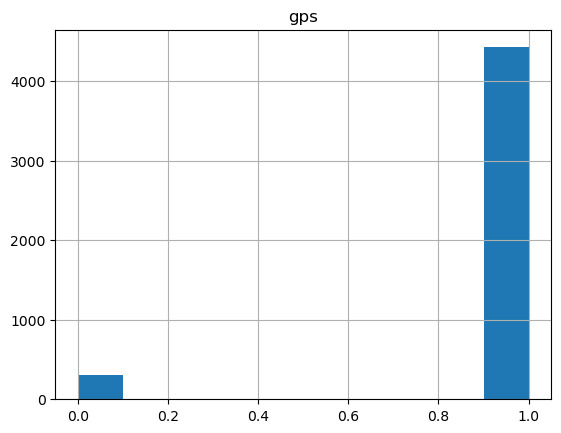

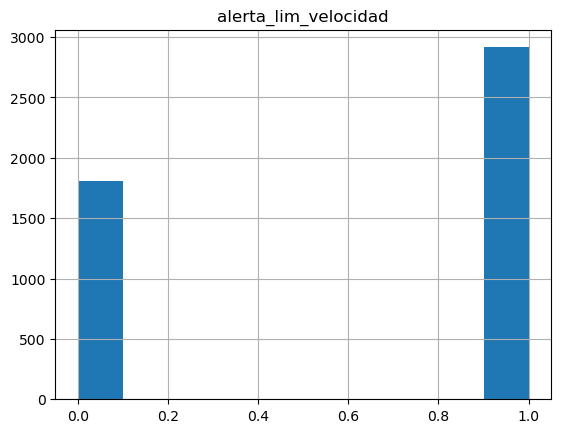

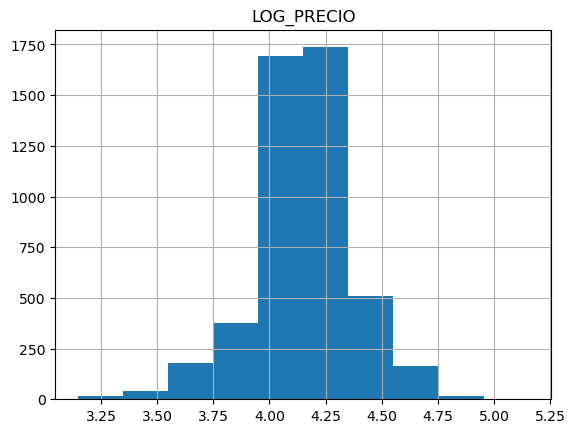

In [2216]:
#imprimo los valores de las variables categóricas y genero un histograma de aquellas de tipo numérico
for i in df_bmw6:
    if (df_bmw6[i].dtype.kind == "O"):
        print(i, "\n", df_bmw6[i].value_counts(), "\n")
    elif (df_bmw6[i].dtype.kind == "f") or (df_bmw6[i].dtype.kind == "i"):
        print(df_bmw6.hist(i))

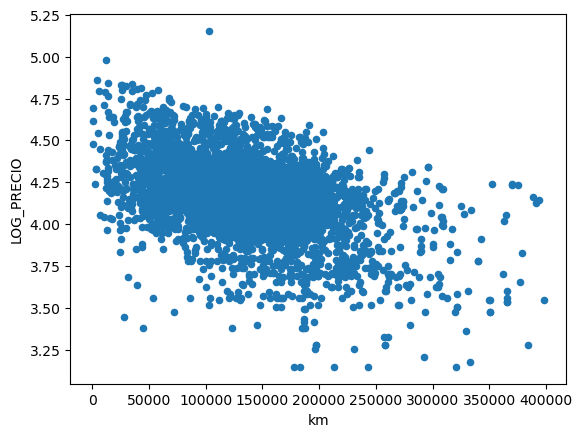

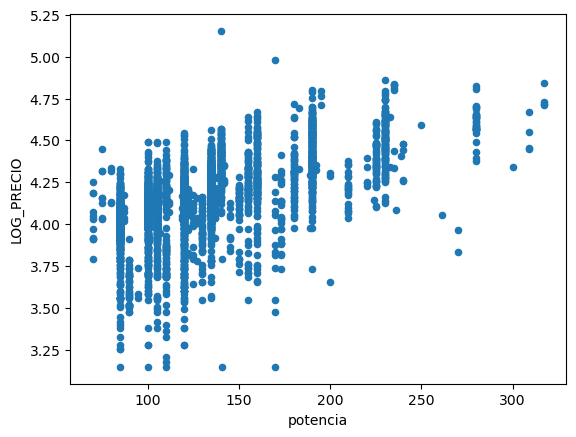

In [2217]:
for columna in lista_numericas:
    df_bmw6.plot.scatter(x=columna, y="LOG_PRECIO")
    plt.show()

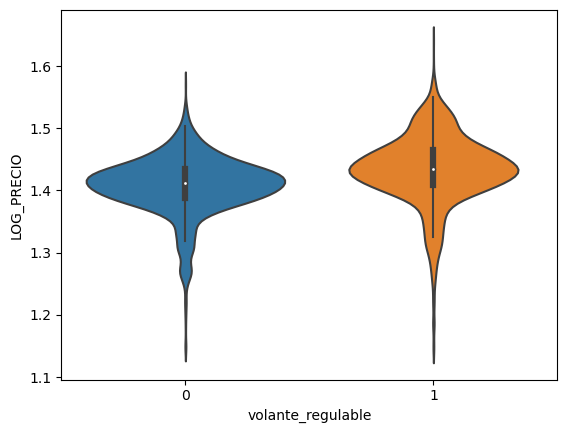

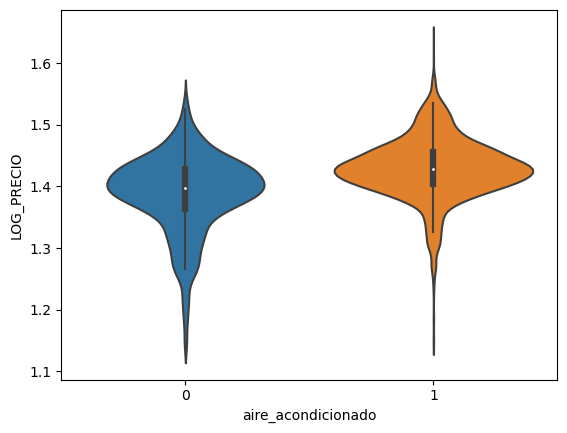

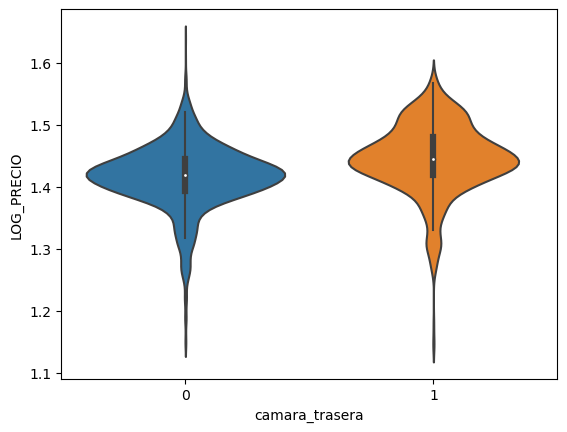

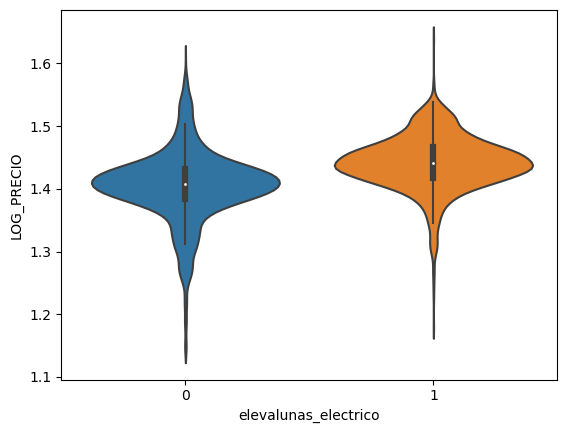

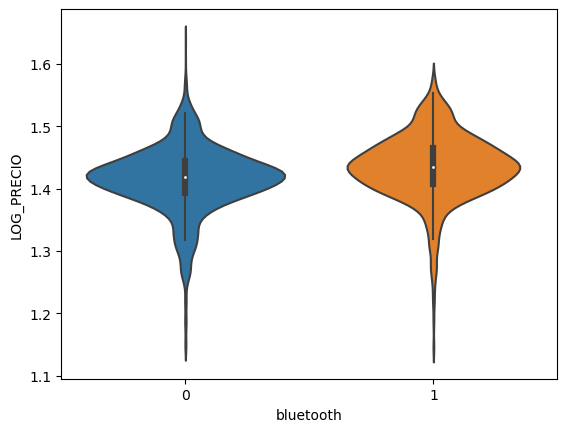

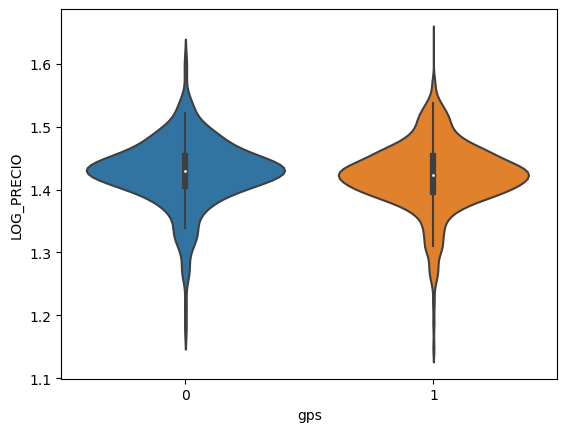

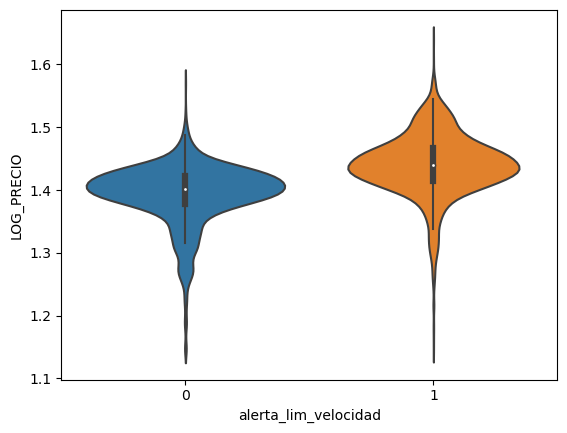

In [2218]:
for i in df_bmw6:
    if (df_bmw6[i].dtype.kind == "i"):
        plt.figure()
        sns.violinplot(x=i, y=np.log(df_bmw6["LOG_PRECIO"]), data=df_bmw6)

In [2219]:
#Creo una función para que clasifique las  columnas en listas numérica, booleanas o categóricas:
target= ["PRECIO","LOG_PRECIO"]
def obtener_lista_variables(dataset):
    lista_numericas=[]
    lista_boolean=[]
    lista_categoricas=[]
    for i in dataset:
        if    (dataset[i].dtype.kind=="f" or dataset[i].dtype.kind=="i") and len(dataset[i].unique())!= 2  and i not in target:
              lista_numericas.append(i)
        elif  (dataset[i].dtype.kind=="f" or dataset[i].dtype.kind=="i")  and len(dataset[i].unique())== 2  and i not in target:
              lista_boolean.append(i)
        elif  (dataset[i].dtype.kind=="O")  and i not in target:
              lista_categoricas.append(i)
                
    return lista_numericas, lista_boolean, lista_categoricas

In [2220]:
#Ejecuto la función para que clasifique las columnas
lista_numericas, lista_boolean, lista_categoricas= obtener_lista_variables(df_bmw6)


In [2221]:
lista_boolean

['volante_regulable',
 'aire_acondicionado',
 'camara_trasera',
 'elevalunas_electrico',
 'bluetooth',
 'gps',
 'alerta_lim_velocidad']

In [2222]:
lista_numericas

['km', 'potencia']

In [2223]:
lista_categoricas

['modelo', 'tipo_gasolina', 'color', 'tipo_coche']

In [2224]:
# Compruebo el porcentaje por cada modelo para quedarme solo con aquellos que sean más frecuentes
conteos_modelo = df_bmw6["modelo"].value_counts()
porcentajes_modelo = conteos_modelo / len(df_bmw6) * 100

# Filtro modelos con más del 1% de frecuencia
modelos_frecuentes = porcentajes_modelo[porcentajes_modelo > 1].index

# Filtro el DataFrame original para incluir solo las filas con modelos frecuentes
df_bmw7= df_bmw6[df_bmw6['modelo'].isin(modelos_frecuentes)]


In [2225]:
df_bmw7.head(1)

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,LOG_PRECIO
0,118,140411.0,100.0,diesel,black,tipo_coche_desconocido,1,1,0,1,0,1,1,4.053078


In [2226]:
# Compruebo el porcentaje por cada tipo de coche para quedarme solo con aquellos que sean más frecuentes
conteos_tipo_coche = df_bmw7["tipo_coche"].value_counts()
porcentajes_tipo_coche = conteos_tipo_coche / len(df_bmw7) * 100

# Filtro tipos de coche con más del 1% de frecuencia
tipos_coche_frecuentes = porcentajes_tipo_coche[porcentajes_tipo_coche > 1].index

# Filtro el DataFrame original para incluir solo las filas con modelos frecuentes
df_bmw8= df_bmw7[df_bmw7['tipo_coche'].isin(tipos_coche_frecuentes)]


In [2227]:

# Compruebo el porcentaje por cada tipo de gasolina para quedarme solo con aquellos que sean más frecuentes
conteos_tipo_gasolina = df_bmw8["tipo_gasolina"].value_counts()
porcentajes_tipo_gasolina = conteos_tipo_gasolina / len(df_bmw6) * 100

# Filtro tipos de gasolina con más del 1% de frecuencia
tipos_gasolina_frecuentes = porcentajes_tipo_gasolina[porcentajes_tipo_gasolina > 1].index

# Filtro el DataFrame original para incluir solo las filas con tipos de gasolina frecuentes
df_bmw9 = df_bmw8[df_bmw8["tipo_gasolina"].isin(tipos_gasolina_frecuentes)]

# Conversión de categóricas a numéricas

In [2228]:
df_bmw9.describe(include="object").T

,count,unique,top,freq
modelo,4084,14,320,704
tipo_gasolina,4084,2,diesel,3986
color,4084,11,black,1269
tipo_coche,4084,6,tipo_coche_desconocido,1236


In [2229]:
#Convierto las columnas categóricas a numéricas
df_bmw9=pd.get_dummies(data=df_bmw9,columns=lista_categoricas).astype("int64")


In [2230]:
df_bmw9.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4084 entries, 0 to 4842
Data columns (total 43 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   km                                 4084 non-null   int64
 1   potencia                           4084 non-null   int64
 2   volante_regulable                  4084 non-null   int64
 3   aire_acondicionado                 4084 non-null   int64
 4   camara_trasera                     4084 non-null   int64
 5   elevalunas_electrico               4084 non-null   int64
 6   bluetooth                          4084 non-null   int64
 7   gps                                4084 non-null   int64
 8   alerta_lim_velocidad               4084 non-null   int64
 9   LOG_PRECIO                         4084 non-null   int64
 10  modelo_116                         4084 non-null   int64
 11  modelo_118                         4084 non-null   int64
 12  modelo_316          

In [2231]:
df_bmw9.describe().T

,count,mean,std,min,25%,50%,75%,max
km,4084.0,143355.670666,54604.255791,612.0,107929.5,144344.0,175763.25,398043.0
potencia,4084.0,122.536729,30.643245,80.0,100.0,120.0,135.00,280.0
volante_regulable,4084.0,0.528404,0.499254,0.0,0.0,1.0,1.00,1.0
aire_acondicionado,4084.0,0.820274,0.384006,0.0,1.0,1.0,1.00,1.0
camara_trasera,4084.0,0.178991,0.383392,0.0,0.0,0.0,0.00,1.0
elevalunas_electrico,4084.0,0.438296,0.496239,0.0,0.0,0.0,1.00,1.0
bluetooth,4084.0,0.337169,0.472801,0.0,0.0,0.0,1.00,1.0
gps,4084.0,0.937316,0.242423,0.0,1.0,1.0,1.00,1.0
alerta_lim_velocidad,4084.0,0.588883,0.492097,0.0,0.0,1.0,1.00,1.0
LOG_PRECIO,4084.0,3.805583,0.395800,3.0,4.0,4.0,4.00,4.0


In [2232]:
def minmaxTransform(to_transform):
    minMaxResultado=MinMaxScaler()
    df_bmw9[to_transform]=minMaxResultado.fit_transform(df_bmw9[to_transform].values.reshape(-1,1))
    return minMaxResultado

In [2233]:
for i in lista_numericas:
  globals()[f"minMax_{i}"] = minmaxTransform(i)

In [2234]:
df_bmw9.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4084 entries, 0 to 4842
Data columns (total 43 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   km                                 4084 non-null   float64
 1   potencia                           4084 non-null   float64
 2   volante_regulable                  4084 non-null   int64  
 3   aire_acondicionado                 4084 non-null   int64  
 4   camara_trasera                     4084 non-null   int64  
 5   elevalunas_electrico               4084 non-null   int64  
 6   bluetooth                          4084 non-null   int64  
 7   gps                                4084 non-null   int64  
 8   alerta_lim_velocidad               4084 non-null   int64  
 9   LOG_PRECIO                         4084 non-null   int64  
 10  modelo_116                         4084 non-null   int64  
 11  modelo_118                         4084 non-null   int64

In [2235]:
df_bmw10=df_bmw9.copy()

In [2236]:
pd.to_pickle(df_bmw10,"C:/Users/stefa/Documents/MASTER/tareas/1/dataEngineeringBmw_Final_PK")

# Correlación Final

In [2237]:
corr2 = df_bmw10.corr()
corr2.style.background_gradient(cmap="coolwarm")


,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,LOG_PRECIO,modelo_116,modelo_118,modelo_316,modelo_318,modelo_318 Gran Turismo,modelo_320,modelo_320 Gran Turismo,modelo_518,modelo_520,modelo_525,modelo_530,modelo_X1,modelo_X3,modelo_X5,tipo_gasolina_diesel,tipo_gasolina_petrol,color_beige,color_black,color_blue,color_brown,color_green,color_grey,color_orange,color_red,color_silver,color_sin_color,color_white,tipo_coche_estate,tipo_coche_hatchback,tipo_coche_sedan,tipo_coche_subcompact,tipo_coche_suv,tipo_coche_tipo_coche_desconocido
km,1.000000,0.026385,0.102413,0.062892,0.008447,0.068324,-0.006975,0.179362,-0.003336,-0.301019,-0.145079,-0.043277,-0.016218,0.042793,0.001456,0.067562,-0.028039,0.029361,0.078123,0.095565,0.071898,-0.081048,-0.054537,-0.053256,0.011565,-0.011565,-0.012819,0.042576,-0.032923,-0.028509,0.017709,0.034581,-0.023585,-0.014979,0.012992,0.010698,-0.065976,0.119870,-0.105739,0.049717,-0.031791,-0.089946,-0.005634
potencia,0.026385,1.000000,0.301990,0.179454,0.276340,0.368838,0.155640,-0.019966,0.434066,0.286952,-0.376676,-0.116677,-0.292917,-0.272059,-0.104495,0.058462,0.047327,-0.081912,0.073133,0.208080,0.416865,-0.105405,0.132238,0.528279,-0.014851,0.014851,-0.027958,0.042823,-0.008092,-0.043629,-0.018127,0.006189,-0.008144,-0.021327,0.015927,-0.011904,-0.011626,0.012905,-0.250869,-0.005581,-0.150421,0.268946,-0.021143
volante_regulable,0.102413,0.301990,1.000000,0.274469,0.238939,0.255208,0.098973,0.231240,0.154708,0.125868,-0.197356,-0.124656,-0.123978,-0.085024,-0.042698,-0.076614,-0.007622,0.074399,0.209319,0.119962,0.119174,-0.091446,0.079312,0.166292,0.034563,-0.034563,-0.036059,0.006843,0.019455,0.046984,0.019666,0.059422,0.007510,-0.044267,-0.004882,-0.025597,-0.107402,0.031675,-0.144376,0.056154,-0.088256,0.080119,-0.023604
aire_acondicionado,0.062892,0.179454,0.274469,1.000000,0.127062,0.255394,0.095079,0.341995,0.136400,0.238969,-0.173491,-0.113638,-0.022786,0.017432,0.031131,-0.022748,-0.000290,0.044819,0.154036,0.051806,0.076647,-0.116128,-0.011111,0.080822,0.055784,-0.055784,0.004199,0.035927,0.012861,0.048112,-0.008108,0.014452,0.012691,-0.042740,-0.028919,-0.046919,-0.051799,0.104060,-0.091737,0.056277,-0.108512,-0.027724,-0.033120
camara_trasera,0.008447,0.276340,0.238939,0.127062,1.000000,0.183579,0.116913,0.060139,0.140884,0.066366,-0.099279,-0.030757,-0.078140,-0.087973,-0.018298,-0.047367,0.019961,0.011076,0.029629,0.080983,0.100231,-0.012379,0.042940,0.180496,-0.014437,0.014437,-0.018757,0.016369,0.016302,-0.012566,0.008206,0.020257,-0.012660,-0.024421,0.007761,-0.048444,-0.007999,-0.017591,-0.054127,-0.025135,-0.042558,0.103137,0.001066
elevalunas_electrico,0.068324,0.368838,0.255208,0.255394,0.183579,1.000000,0.200913,0.173466,0.293763,0.248155,-0.173799,-0.091452,-0.148666,-0.140182,-0.034076,0.018866,0.042909,0.113780,0.155719,0.117691,0.150940,-0.093880,0.037958,0.121473,0.003073,-0.003073,-0.020396,0.072300,-0.028730,-0.019203,-0.027973,-0.022536,0.012479,-0.021963,-0.034825,-0.010102,0.021493,0.076403,-0.108729,0.012049,-0.098618,0.030595,-0.009382
bluetooth,-0.006975,0.155640,0.098973,0.095079,0.116913,0.200913,1.000000,0.092557,0.073800,0.095165,-0.033687,0.009949,-0.086472,-0.014343,0.024812,0.025551,0.034335,-0.042117,-0.005362,0.012776,0.052428,-0.069198,0.046048,0.051304,0.010298,-0.010298,-0.002699,0.035962,0.005057,-0.048979,0.015259,-0.024236,-0.000220,0.019268,-0.035735,-0.015831,0.050499,0.002885,0.032878,-0.017850,-0.051276,0.029224,-0.017748
gps,0.179362,-0.019966,0.231240,0.341995,0.060139,0.173466,0.092557,1.000000,-0.074414,-0.019835,0.029965,0.009226,0.026358,0.045344,0.020435,-0.047794,-0.011412,0.017121,0.061820,0.019801,0.040995,-0.127762,-0.085137,0.027902,0.058464,-0.058464,0.022617,0.040481,0.007228,0.031183,0.011457,0.027512,-0.030274,-0.007257,-0.029550,-0.010579,-0.106767,0.067778,0.007166,0.027850,0.026669,-0.111020,-0.009946
alerta_lim_velocidad,-0.003336,0.434066,0.154708,

In [2238]:
#Conversión del dataset
df_bmw10.to_csv("dfbmw_clean.csv", index=False)
df_bmw10.to_excel("dfbmw_clean.xlsx", index= False)

In [2239]:
df_bmw10.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4084 entries, 0 to 4842
Data columns (total 43 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   km                                 4084 non-null   float64
 1   potencia                           4084 non-null   float64
 2   volante_regulable                  4084 non-null   int64  
 3   aire_acondicionado                 4084 non-null   int64  
 4   camara_trasera                     4084 non-null   int64  
 5   elevalunas_electrico               4084 non-null   int64  
 6   bluetooth                          4084 non-null   int64  
 7   gps                                4084 non-null   int64  
 8   alerta_lim_velocidad               4084 non-null   int64  
 9   LOG_PRECIO                         4084 non-null   int64  
 10  modelo_116                         4084 non-null   int64  
 11  modelo_118                         4084 non-null   int64

In [2240]:
df_bmw10.head(5)

,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,LOG_PRECIO,...,color_red,color_silver,color_sin_color,color_white,tipo_coche_estate,tipo_coche_hatchback,tipo_coche_sedan,tipo_coche_subcompact,tipo_coche_suv,tipo_coche_tipo_coche_desconocido
0,0.351757,0.100,1,1,0,1,0,1,1,4,...,0,0,0,0,0,0,0,0,0,1
2,0.459665,0.200,0,0,0,1,0,1,0,4,...,0,0,0,1,0,0,0,0,0,1
30,0.489398,0.125,1,1,0,0,1,1,0,3,...,1,0,0,0,0,0,0,0,0,1
56,0.826712,0.150,1,0,0,0,1,1,1,3,...,0,1,0,0,0,0,0,0,0,1
85,0.508768,0.250,0,0,0,1,0,1,1,3,...,0,1,0,0,0,0,0,0,0,1
